## Analysis 2 -- Overview using the previous analysis and finding out few important points

### FInding out the top 10 directors who have managed to get a lot of profit from their movies.

In [1]:
import os                            #importng os library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib_venn import venn3, venn3_circles

In [2]:
path=os.chdir("..")                   #Moving back one folder


In [3]:
path=os.getcwd()                          #Checking the path
path

'C:\\DataAnalysis4Python\\kanakia_dhruv_spring2017\\Final'

In [4]:
final_path1= path+"\\Data\\movie_metadata.csv"

In [5]:
final_path= path+"\\Data\\first_analysis.csv" #setting up the final path in final_path

In [6]:
df3=pd.read_csv(final_path1)

In [7]:
final_path

'C:\\DataAnalysis4Python\\kanakia_dhruv_spring2017\\Final\\Data\\first_analysis.csv'

In [8]:
df= pd.read_csv(final_path, encoding='ISO-8859-1')
#df.head()

In [9]:
df1=(df.dropna())

df2=df1.copy()

## 2.1 FInding out the top 10 directors who have managed to get a lot of profit from their movies.

In [10]:
df_director_netp=df2.groupby(['director_name'], as_index=False)['net_percentage'].agg(['mean',len]).reset_index()

In [11]:
# df_director_netp.head()

In [12]:
df_director_netp.describe()

,mean,len
count,1659.000000,1659.000000
mean,930.856029,2.264014
std,19744.237416,2.300202
min,-99.998200,1.000000
25%,-51.471998,1.000000
50%,14.836059,1.000000
75%,129.884743,3.000000
max,719348.553333,25.000000


In [13]:
df_director_netp.sort_values(by='mean', ascending=False).head()

,director_name,mean,len
1170,Oren Peli,719348.553333,1.0
803,Jonathan Caouette,271466.055046,1.0
304,Daniel Myrick,234116.856667,1.0
1590,Travis Cluff,22657.819000,1.0
420,Edward Burns,20528.188843,2.0


#### This analysis does not give clearly idea as in how efficient/profitable a director is as top 4 most profitable directors have only made 1 movie.
#### AND,
#### Mean clearly indicates that most of the directors in the database has number of movies less than 2. 
#### So, considering directors with only 1 movie won't give an exact idea as in how profitable that director is.
#### Hence, we will only consider average net percentage of directors who have made more than 5 movies and ignore the other's.

In [14]:
df_sorting_dir_netp= df_director_netp[df_director_netp['len']>4]

In [15]:
df_sorting_dir_netp=df_sorting_dir_netp.sort_values(by='mean', ascending=False)

In [16]:
df_dir_top_netp= df_sorting_dir_netp.head(10)

In [17]:
df_dir_top_netp

,director_name,mean,len
1549,Tobe Hooper,12488.116922,6.0
739,John Carpenter,3928.914917,13.0
518,George Lucas,3902.030958,5.0
1343,Robert Rodriguez,2308.885054,13.0
638,James Wan,1477.369904,7.0
315,Darren Aronofsky,1035.284582,6.0
653,Jason Reitman,692.202798,6.0
893,Kevin Smith,651.920087,10.0
1300,Richard Linklater,564.542021,11.0
718,Joe Dante,514.106996,6.0


In [18]:
%matplotlib inline

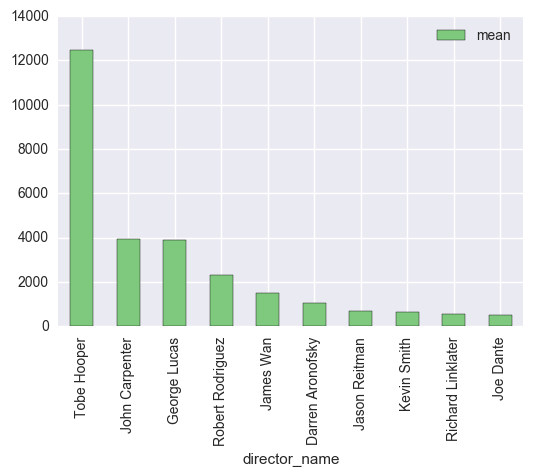

In [19]:
df_dir_top_netp.plot(x='director_name', y='mean', kind='bar', cmap='Accent')

## THe above data frame clearly shows tobe hooper has the highest net profit percentage in terms of directors who have directed atleast 4 movies.

## The most efficient would be JOHN CARPENTER as he has directed 13 movies which is a large number and even then manages to be second on the list of net percentage

## Q. Best director in terms of IMDB Rating

In [20]:
df_director_imdb=df2.groupby(['director_name'], as_index=False)['imdb_score'].agg(['mean',len]).reset_index()

In [21]:
df_sorting_dir_imdb= df_director_imdb.sort_values(by='mean', ascending=False)

In [22]:
df_sorting_dir_imdb= df_sorting_dir_imdb[df_sorting_dir_imdb['len']>4]

In [23]:
df_dir_top_imdb= df_sorting_dir_imdb.head(10)

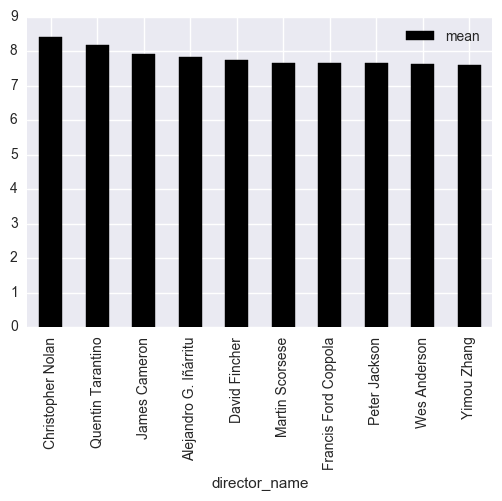

In [28]:
df_dir_top_imdb.plot(x='director_name', y='mean', kind='bar', cmap='spectral')

## Christopher Nolan is the best director when it comes to imdb score.


## Q.Calculating best director on the basis of imdb score, net percentage and facebook popularity.

In [97]:
df_best_dir=df1[['net','director_name']]

In [98]:
df_best_dir=df_best_dir.groupby(['director_name']).mean().reset_index()

In [99]:
df_best_dir=df_best_dir.sort_values(by='net',ascending=0)[:50]

In [100]:
df_best_dir= df_best_dir[['director_name']].values.tolist()


In [101]:
df_best_dir1= df1[['num_critic_for_reviews','director_name']]
df_best_dir1=df_best_dir1.groupby(['director_name']).mean().reset_index()
df_best_dir1= df_best_dir1.sort_values(by='num_critic_for_reviews', ascending=0)[:50]


In [102]:
df_best_dir1= df_best_dir1[['director_name']].values.tolist()

In [103]:
df_best_dir2 = df1[['director_name','imdb_score']]
df_best_dir2 = df_best_dir2.groupby(['director_name']).mean().reset_index()
df_best_dir2 = df_best_dir2.sort_values(by='imdb_score', ascending=0)[:50]
df_best_dir2= df_best_dir2[['director_name']].values.tolist()

In [104]:
result_dir1=[word for word in df_best_dir if word in df_best_dir1]

In [105]:
len(result_dir1)

9

In [110]:
result_dir_final= [word for word in df_best_dir2 if word in result_dir1][:1]

In [111]:
result_dir_final

[['Christopher Nolan']]

## SO THE BEST DIRECTOR IS CHRISTOPHER NOLAN

### Q. FInding out the top  actor based on IMDB Rating

In [112]:
df_actor_imdb=df1.groupby(['actor_1_name'], as_index=False)['imdb_score'].agg(['mean',len]).reset_index()

In [113]:
df_sorting_actor_imdb= df_actor_imdb.sort_values(by='mean', ascending=False)

In [114]:
df_sorting_actor_imdb= df_sorting_actor_imdb[df_sorting_actor_imdb['len']>6]

In [115]:
df_actor_top_imdb= df_sorting_actor_imdb.head(25)

In [116]:
df_actor_top_imdb.head()

,actor_1_name,mean,len
823,Leonardo DiCaprio,7.495238,21.0
271,Clint Eastwood,7.441667,12.0
1339,Tom Hanks,7.425000,24.0
1340,Tom Hardy,7.288889,9.0
21,Alan Rickman,7.287500,8.0


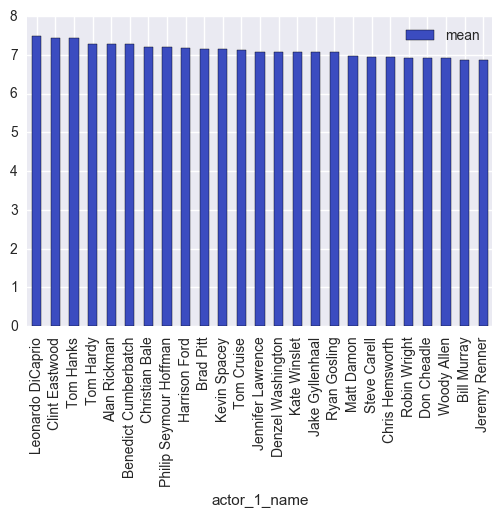

In [117]:
df_actor_top_imdb.plot(x='actor_1_name', y='mean', kind='bar', cmap='coolwarm')

## Leonardo Di caprio is the leading actor as per IMDB rating

In [123]:
df_best_actor=df1[['net','actor_1_name']]
df_best_actor=df_best_actor.groupby(['actor_1_name'])['net'].agg(['mean',len])
df_best_actor=df_best_actor[df_best_actor['len']>6].reset_index()
df_best_actor.head()

,actor_1_name,mean,len
0,Adam Sandler,1.986211e+07,14.0
1,Adam Scott,-4.066971e+05,8.0
2,Al Pacino,1.245669e+07,13.0
3,Alan Rickman,3.236445e+07,8.0
4,Alexa PenaVega,-8.617856e+05,7.0


In [125]:
df_best_actor=df_best_actor.sort_values(by='mean',ascending=0)[:25]
df_best_actor= df_best_actor[['actor_1_name']].values.tolist()

In [126]:
df_best_actor1= df1[['actor_1_facebook_likes','actor_1_name']]
df_best_actor1=df_best_actor1.groupby(['actor_1_name'])['actor_1_facebook_likes'].agg(['sum',len])
df_best_actor1=df_best_actor1[df_best_actor1['len']>6].reset_index()
df_best_actor1.head()

,actor_1_name,sum,len
0,Adam Sandler,154000.0,14.0
1,Adam Scott,24000.0,8.0
2,Al Pacino,182000.0,13.0
3,Alan Rickman,200000.0,8.0
4,Alexa PenaVega,14000.0,7.0


In [127]:
df_best_actor1=df_best_actor1.sort_values(by='sum',ascending=0)[:15]
df_best_actor1= df_best_actor1[['actor_1_name']].values.tolist()

In [128]:
df_best_actor2 = df1[['actor_1_name','imdb_score']]
df_best_actor2 = df_best_actor2.groupby(['actor_1_name'])['imdb_score'].agg(['mean',len])
df_best_actor2=df_best_actor2[df_best_actor2['len']>6].reset_index()
df_best_actor2 = df_best_actor2.sort_values(by='mean', ascending=0)[:15]
df_best_actor2= df_best_actor2[['actor_1_name']].values.tolist()

In [130]:
result_actor1=[word for word in df_best_actor if word in df_best_actor1]

In [131]:
len(result_actor1)

3

In [132]:
result_actor_final=[word for word in df_best_actor2 if word in result_actor1]

In [133]:
result_actor_final

[['Leonardo DiCaprio'], ['Jennifer Lawrence']]

## The best actor when considering imdb, net profit and facebook likes is leonardo di caprio


### Which Country has the highest mean budget

In [134]:
df_budget_country= df2[['country','budget']]

In [135]:
df_budget_country= df_budget_country.groupby(['country'])['budget'].agg(['mean', len]).reset_index()

In [136]:
df_budget_country.head()

,country,mean,len
0,Afghanistan,4.600000e+04,1.0
1,Argentina,1.633333e+06,3.0
2,Aruba,3.500000e+07,1.0
3,Australia,3.785783e+07,39.0
4,Belgium,1.500000e+07,1.0


In [137]:
df_budget_country= df_budget_country[df_budget_country['len']>1]

In [138]:
df_budget_country= df_budget_country.sort_values(by='mean', ascending=False)

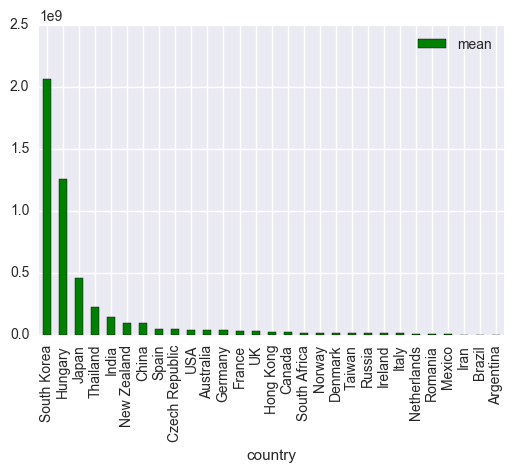

In [139]:
df_budget_country.plot(x='country',y='mean', kind='bar', color='green')

### South Korea has the highest Mean budget over the years followed by Hungary, Japan, Thailand and INDIA

### Q. Which country has the highest gross revenue?

In [140]:
df_gross_country= df2[['country','gross']]

In [141]:
df_gross_country= df_gross_country.groupby(['country'])['gross'].agg(['mean', len]).reset_index()

In [142]:
df_gross_country= df_gross_country[df_gross_country['len']>1]

In [143]:
df_gross_country= df_gross_country.sort_values(by='mean', ascending=False)

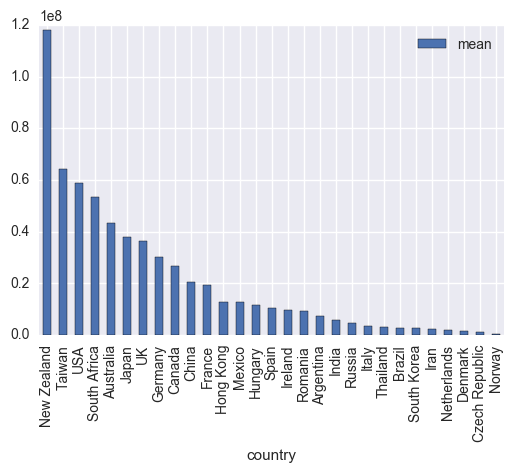

In [144]:
df_gross_country.plot(x='country',y='mean', kind='bar')

###  •	New Zealand tops the average movie revenue (~90 M) and is significantly higher than the second highest Taiwan.

In [145]:
df2.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,net,net_percentage
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257
4,5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775


In [146]:
df3.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [147]:
df_country_language= df3.groupby(['country','language']).size().reset_index()

In [148]:
df_country_language=df_country_language.groupby('country')['language'].count().reset_index()

In [149]:
df_country_language.head()

,country,language
0,Afghanistan,1
1,Argentina,1
2,Aruba,1
3,Australia,3
4,Bahamas,1


In [150]:
df_country_language1= df_country_language[df_country_language['language']>2]

In [151]:
df_country_language1= df_country_language1.set_index('country')

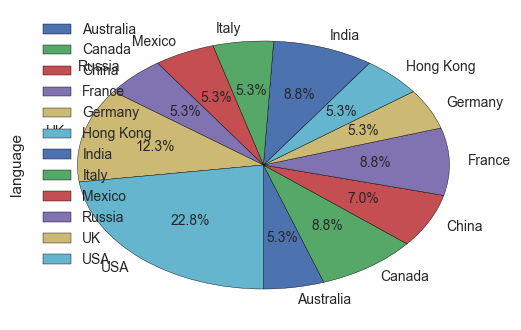

In [152]:
df_country_language1.plot(x='country', y='language', kind='pie',autopct='%1.1f%%', startangle=270)

## USA has the highest number of different language movie releases followed by UK, France Hong Kong and Russia